In [31]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib
import sklearn

In [32]:
# This is a quick check of whether the notebook is currently running on Google Colaboratory
# or on Kaggle, as that makes some difference for the code below.
# We'll do this in every notebook of the course.
try:
    import colab
    colab=True
except:
    colab=False

import os
kaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')

In [33]:
# Set the directory in which to store data
NB_DIR = Path.cwd()       # Set NB_DIR to be the current working directory
DATA = NB_DIR/'data'      # The data dir is the subdirectory 'data' under NB_DIR

DATA.mkdir(exist_ok=True) # Create the data directory

In [34]:
import urllib.request

# Define the file path
FILE = DATA / 'diabetes.csv'

# Download the file if it doesn't exist
if not FILE.exists():
    url = 'https://assets.datacamp.com/production/course_1939/datasets/diabetes.csv'
    urllib.request.urlretrieve(url, FILE)

In [35]:
diabetes = pd.read_csv('data/diabetes.csv')

In [36]:
diabetes.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


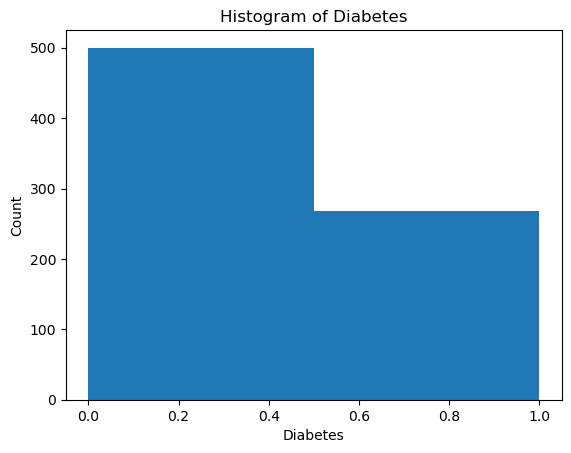

In [37]:
# Plot a histogram of the diabetes column
plt.hist(diabetes['diabetes'], bins=2)

# Add axis labels and a title
plt.xlabel('Diabetes')
plt.ylabel('Count')
plt.title('Histogram of Diabetes')

# Show the plot
plt.show()

In [38]:
X = diabetes.drop('diabetes', axis=1)
y = diabetes['diabetes']

In [39]:
X.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [40]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: diabetes, dtype: int64

In [41]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [42]:
len(X_train), len(X_test)

(576, 192)

In [43]:
from sklearn.linear_model import SGDClassifier

In [44]:
# Create an instance of the model:
sgd_clf = SGDClassifier(random_state=20)

In [45]:
# Train the model:
sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=20)

In [46]:
y_pred = sgd_clf.predict(X_test)
y_pred[:10]  # Displaying the first 10 predictions

array([1, 0, 0, 0, 0, 1, 1, 1, 1, 0])

In [47]:
np.array(y_test)[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1])

In [50]:
print("True and predicted labels for the first 20 instances:")
#bruker zip for å printe de ved siden av hverandre. er vanskelig å få oversikt hvis det er slik som det er ovenfor.
print(list(zip(y_test, y_pred))[:20])

True and predicted labels for the first 20 instances:
[(0, np.int64(1)), (0, np.int64(0)), (0, np.int64(0)), (0, np.int64(0)), (0, np.int64(0)), (0, np.int64(1)), (0, np.int64(1)), (0, np.int64(1)), (0, np.int64(1)), (0, np.int64(0)), (1, np.int64(1)), (0, np.int64(1)), (1, np.int64(1)), (0, np.int64(1)), (0, np.int64(0)), (1, np.int64(1)), (0, np.int64(0)), (0, np.int64(1)), (1, np.int64(1)), (1, np.int64(1))]


In [51]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.5416666666666666

## Validation set and model selection

model selection: vleger den beste modellen og tjuner parameterene. bruker ikke testsettet for å tjune, men bruker et valideringssett.

## Cross-validation

er en metode i maskinlæring for å teste hvor godt en modell generaliserer – altså hvor bra den vil prestere på ny, ukjent data.
Det er en måte å evaluere en modell uten å sløse bort for mye data på testsettet. Når du trener en modell, bruker du treningsdata.
Men om du bare tester den på samme data du trente på, får du en urealistisk høy score – modellen kan ha lært dataene utenat (overfitting).

Cross-validation løser dette ved å:
	•	Dele treningsdataen i flere deler (folds)
	•	Trene og teste flere ganger på forskjellige deler
	•	Deretter ta gjennomsnittet av resultatene

Dette gir et mye mer robust estimat av hvordan modellen faktisk vil prestere i virkeligheten.

In [52]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(sgd_clf, X_train, y_train, cv=5, 
                            scoring='accuracy', n_jobs=-1)

In [53]:
print(cv_scores)

[0.62068966 0.55652174 0.34782609 0.65217391 0.68695652]


In [54]:
cv_scores.mean()

np.float64(0.5728335832083958)

In [55]:
diabetes['diabetes'].value_counts()

diabetes
0    500
1    268
Name: count, dtype: int64

In [56]:
y_dummy = [0,]*len(y_test) # This creates a list of 0 with the same length as `y_test`
accuracy_score(y_test, y_dummy)

0.640625

...64%! 

This is **The Trap of Unbalanced Datasets**.  In cases where one class dominates, a naive classifier predicting the majority class will still have high accuracy.

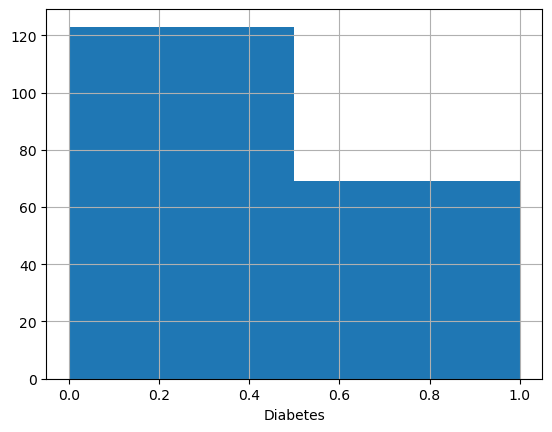

In [57]:
y_test.hist(bins=2)
plt.xlabel('Diabetes')
plt.show()

Guessing "non-diabetic" for all instances yields an accuracy of around 64%. In unbalanced datasets, metrics other than accuracy become crucial.

> Note that accuracy isn't always the best metric even in balanced datasets, especially when the consequences of certain types of misclassifications (like false negatives or false positives) are significantly different.



## Confusion matrix

In [63]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=5, n_jobs=-1)

In [64]:
y_train_pred

array([1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [65]:
np.array(y_train)

array([1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,

In [66]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train, y_train_pred)
print(cm)

[[226 151]
 [ 95 104]]


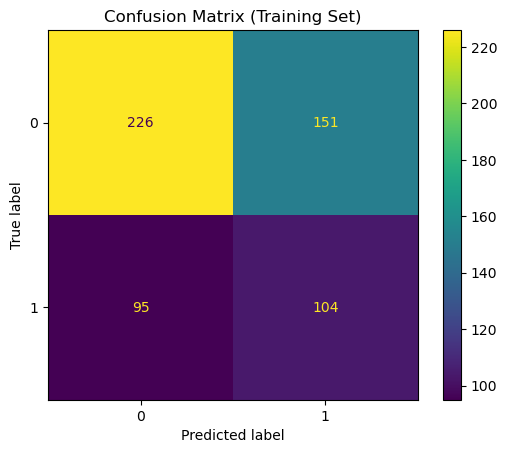

In [67]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
plt.title('Confusion Matrix (Training Set)')
plt.show()

### Connection to the confusion matrix

In [68]:
# Using elements from a two-dimensional array
tn, fp, fn, tp = cm.ravel()

In [69]:
precision = tp / ( tp + fp )
recall = tp / ( tp + fn )
specificity = tn / ( tn + fp )

In [70]:
print(f"Precision: {precision}\n Recall: {recall}\n Specificity: {specificity}")

Precision: 0.40784313725490196
 Recall: 0.5226130653266332
 Specificity: 0.5994694960212201


In [71]:
#this is scikit-learns sin innebygde metode for å fine precision og recall, slik at vi slipper å gjøre alt det som er ovenfor:
from sklearn.metrics import precision_score, recall_score

print(precision_score(y_train, y_train_pred))
print(recall_score(y_train, y_train_pred))

0.40784313725490196
0.5226130653266332


## $F_1$ score

In [78]:
from sklearn.metrics import f1_score

f1_score(y_train, y_train_pred)

0.5728395061728395

In [79]:
# %load /Users/christoffertoftevag/2025/2025-høst/DAT158/github repo/DAT158-main 2/notebooks/solutions/1.3-1-sgd_normalized.py
from sklearn.preprocessing import StandardScaler

# Create an instance of the StandardScaler
scaler = StandardScaler()

# Fit and transform the training and test data using the scaler
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train an SGDClassifier
sgd_clf_scaled = SGDClassifier(random_state=20)
sgd_clf_scaled.fit(X_train_scaled, y_train)

# Compute the cross-validation predictions on the scaled training set
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=5)

# Print the accuracy, confusion matrix, and F1 score
print("Cross-validation results on the scaled training set:")
print(f"Accuracy: {accuracy_score(y_train, y_train_pred)}")
print(f"Confusion matrix:\n{confusion_matrix(y_train, y_train_pred)}")
print(f"F1 score: {f1_score(y_train, y_train_pred)}")


Cross-validation results on the scaled training set:
Accuracy: 0.6996527777777778
Confusion matrix:
[[287  90]
 [ 83 116]]
F1 score: 0.5728395061728395


In [80]:
sgd_clf = sgd_clf_scaled

X_train = X_train_scaled
X_test = X_test_scaled

## Precision/recall tradeoff

In [83]:
# Features
X_test[0]

array([ 0.6839137 , -0.70579433, -0.625833  ,  0.81143325,  0.94414993,
        0.26501306, -0.11390738,  0.87654579])

In [84]:
# Label
y_test.iloc[0]

np.int64(0)

In [85]:
y_example_score = sgd_clf.decision_function([X_test[0]])

In [86]:
print(y_example_score)

[-1.75669501]


In [ ]:
#vi kan endre threshold for å endre på om en person for eksempel er syk eller ikke. 

In [87]:
threshold = 0
y_example_pred = (y_example_score > threshold)
print(f"Is it a diabetes instance? {y_example_pred}")

Is it a diabetes instance? [False]


In [88]:
threshold = -10
y_example_pred = (y_example_score > threshold)
print(f"Is it a diabetes instance? {y_example_pred}")

Is it a diabetes instance? [ True]


In [89]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train, cv=2, method='decision_function')

In [90]:
y_scores.shape

(576,)

In [91]:
from sklearn.metrics import precision_recall_curve

# Compute the precision and recall scores for different threshold values
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

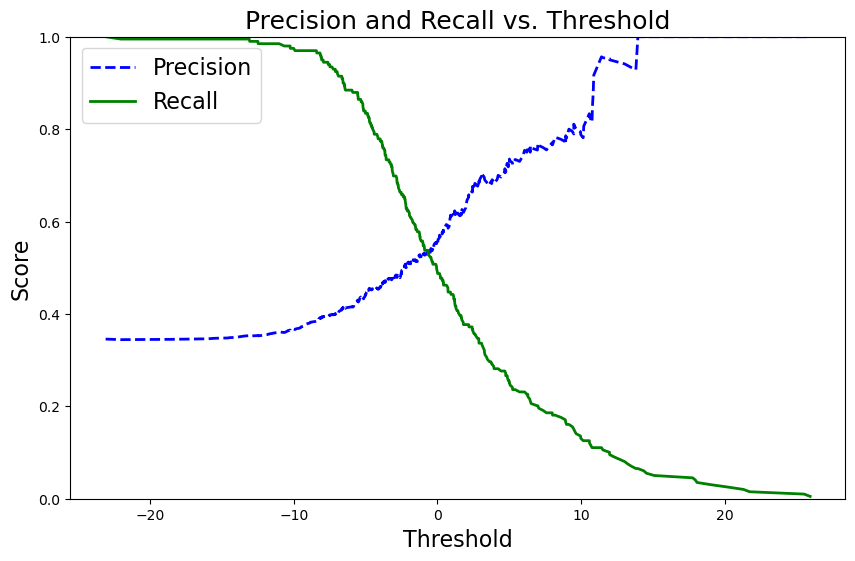

In [92]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.ylabel("Score", fontsize=16)
    plt.title("Precision and Recall vs. Threshold", fontsize=18)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 1])

plt.figure(figsize=(10, 6))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [93]:
y_train_pred_precise = (y_scores > 18)
precision_score(y_train, y_train_pred_precise)

1.0

In [94]:
recall_score(y_train, y_train_pred_precise)

0.035175879396984924

In [97]:
from sklearn.ensemble import RandomForestClassifier

# Create an instance of the RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Generate cross-validation predictions on the training set
y_train_pred_rf = cross_val_predict(rf_clf, X_train, y_train, cv=3)

# Print the shape of the predicted labels array
print("Shape of the predicted labels array:")
print(y_train_pred_rf.shape)

Shape of the predicted labels array:
(576,)


In [98]:
# Compute the F1 score for the two classifiers
f1_sgd = f1_score(y_train, y_train_pred)
f1_rf = f1_score(y_train, y_train_pred_rf)

# Print the F1 scores for the two classifiers
print("F1 scores for the classifiers:")
print(f"RandomForestClassifier: {f1_rf:.3f}")
print(f"SGDClassifier: {f1_sgd:.3f}")

F1 scores for the classifiers:
RandomForestClassifier: 0.625
SGDClassifier: 0.573


In [99]:
print(confusion_matrix(y_train, y_train_pred_rf))

[[323  54]
 [ 84 115]]


In [100]:
print(confusion_matrix(y_train, y_train_pred))

[[287  90]
 [ 83 116]]


In [101]:
%%time 
cross_val_score(rf_clf, X_train, y_train, cv=3).mean()

CPU times: user 227 ms, sys: 5.69 ms, total: 232 ms
Wall time: 308 ms


np.float64(0.7604166666666666)

In [102]:
%%time 
cross_val_score(sgd_clf, X_train, y_train, cv=3).mean()

CPU times: user 15.4 ms, sys: 2.45 ms, total: 17.9 ms
Wall time: 18.8 ms


np.float64(0.71875)

In [103]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
rf_clf.score(X_test, y_test)

0.7395833333333334